In [1]:
import pandas as pd
path = '/Users/liuchang/Desktop/pima-indians-diabetes.data.csv'
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin','bmi','pedigree', 'age', 'label']
pima = pd.read_csv(path, header=None, names=col_names)

In [2]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Define X and y
feature_cols = ['pregnant','insulin','bmi','age']
X = pima[feature_cols]
y = pima.label
# Split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [4]:
## Make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.6927083333333334


In [5]:
y_test.value_counts()

0    130
1     62
Name: label, dtype: int64

In [6]:
y_test.mean()

0.3229166666666667

In [7]:
1- y_test.mean()

0.6770833333333333

In [8]:
max(y_test.mean(), 1-y_test.mean())

0.6770833333333333

In [9]:
# calculate null accuracy
y_test.value_counts().head(1) / len(y_test)

0    0.677083
Name: label, dtype: float64

In [10]:
# Print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred: [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [11]:
## Confusion matrix
print(metrics.confusion_matrix(y_test, y_pred_class))

[[118  12]
 [ 47  15]]


In [12]:
print('True:',y_test.values[0:25])

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]


In [13]:
print('Pred:',y_pred_class[0:25])

Pred: [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [15]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [16]:
print((TP+TN)/float(TP+TN+FP+FN))

0.6927083333333334


In [17]:
print(metrics.accuracy_score(y_test, y_pred_class))

0.6927083333333334


In [18]:
print((FP+FN)/float(TP+TN+FP+FN))

0.3072916666666667


In [19]:
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.30729166666666663


In [20]:
print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.24193548387096775
0.24193548387096775


In [21]:
## Adjusting th classification threshold
logreg.predict(X_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [22]:
logreg.predict_proba(X_test)[0:10, :]

array([[0.63247571, 0.36752429],
       [0.71643656, 0.28356344],
       [0.71104114, 0.28895886],
       [0.5858938 , 0.4141062 ],
       [0.84103973, 0.15896027],
       [0.82934844, 0.17065156],
       [0.50110974, 0.49889026],
       [0.48658459, 0.51341541],
       [0.72321388, 0.27678612],
       [0.32810562, 0.67189438]])

In [23]:
y_pred_prob = logreg.predict_proba(X_test)[:,1]

Text(0,0.5,'Frequency')

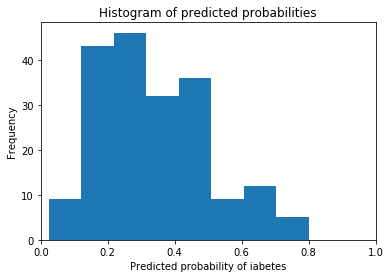

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(y_pred_prob, bins=8)
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of iabetes')
plt.ylabel('Frequency')

In [25]:
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.3)[0]
y_pred_prob[0:10]

array([0.36752429, 0.28356344, 0.28895886, 0.4141062 , 0.15896027,
       0.17065156, 0.49889026, 0.51341541, 0.27678612, 0.67189438])

In [26]:
y_pred_class[0:10]

array([1., 0., 0., 1., 0., 0., 1., 1., 0., 1.])

In [27]:
print(confusion)

[[118  12]
 [ 47  15]]


In [28]:
print(metrics.confusion_matrix(y_test, y_pred_class))

[[80 50]
 [16 46]]


In [29]:
print(46 / float(46 + 16))

0.7419354838709677


In [30]:
print(80 / float(80 + 50))

0.6153846153846154


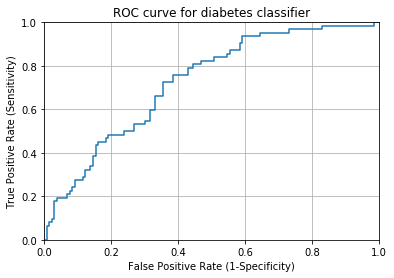

In [31]:
## ROC Curves and Area Under the Curve(AUC)
# PLot the ROC curvel
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [32]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evalute_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:',1-fpr[thresholds > threshold][-1])

In [33]:
evalute_threshold(0.5)

Sensitivity: 0.24193548387096775
Specificity: 0.9076923076923077


In [34]:
evalute_threshold(0.3)

Sensitivity: 0.7258064516129032
Specificity: 0.6153846153846154


In [35]:
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.7245657568238213


In [36]:
## calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.7378233618233618